# CSMODEL Project - Case Study
In this Notebook, we will be discussing and exploring the dataset about [Diabetes](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data) taken from the website Kaggle.

This dataset, sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to predict the presence of diabetes in patients using specific diagnostic measurements found in the dataset. It's important to note that the dataset was carefully curated, with specific criteria in mind. All the individuals included are female, at least 21 years of age, and of Pima Indian heritage.\

**Members:**

Argamosa, Daniel Cedric (S12)

Donato, Adriel Joseph (S13)

Srivastava, Naman (S13)

## Dataset Collection Process and Implications
The dataset was gathered from the Pima Indian population near Phoenix, Arizona, a community under continuous study by the National Institute of Diabetes and Digestive and Kidney Diseases since 1965 due to its high incidence of diabetes. This dataset exclusively focuses on female individuals of at least 21 years of age who are of Pima Indian heritage, adhering to specific selection criteria. Now, the study that used this dataset employed a longitudinal approach, conducting standardized examinations every two years, which included an oral glucose tolerance test to diagnose diabetes. Diagnosis followed World Health Organization Criteria, ensuring clinical confirmation of diabetes cases. The dataset's thorough validation process establishes it as a reliable resource for investigating the prediction of diabetes onset over time.

Now, in terms of the possible implications this might have for the conclusions and insights there are a few. First, the dataset exclusively focuses on female individuals of Pima Indian heritage. Therefore, insights drawn from this dataset may not be generalizable to other populations. The findings would apply specifically to this demographic group. Second, the strict diagnostic criteria for diabetes diagnosis ensure that the individuals included in the dataset are accurately diagnosed cases, enhancing the reliability of the data for research purposes. Third, the dataset's age range restriction may limit its applicability to younger age groups. Lastly, the influence of Pima Indian heritage introduces genetic and cultural factors that may not be present to the same extent in other populations, further emphasizing the need for caution when extending conclusions beyond this specific demographic.

## The Dataset
The dataset `diabetes` has **768 participating female individuals** (rows) and has several variables (columns) related to them, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome). 

If you view the `.csv` file in Excel, you can see that our dataset contains many observations across **9 variables**. The following are the descriptions of each variable in the dataset:

- **`Pregnancies`**: To express the Number of pregnancies
- **`Glucose`**: To express the Glucose level in blood
- **`BloodPressure`**: To express the Blood pressure measurement (mm Hg)
- **`SkinThickness`**: To express the thickness of the skin (mm)
- **`Insulin`**: To express the Insulin level in blood (mu U/ml) 
- **`BMI`**: To express the Body mass index
- **`DiabetesPedigreeFunction`**: To express the Diabetes percentage
- **`Age`**: To express the age
- **`Outcome`**: To express the final result 1 is Yes and 0 is No

### **Imports:**

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **General Info:**

In [290]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [291]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [292]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [293]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Data Cleaning**

Check if the data types are correct:

In [294]:
data_types = df.dtypes
print(data_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Check for any missing values:

In [295]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for any duplicate rows:

In [296]:
df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [297]:
df.duplicated().sum()

0

Check if some values are set to a certain default value:

In [298]:
has_zeros = (df == 0).any()
cols = has_zeros[has_zeros].index
print(cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


- It makes sense for Pregnancies and Outcome to have 0s, but the rest may have it as an error or missing value as stated in the dataset description.

- In order for Imputation Techniques, checking the distribution for all the vairables that have 0 as it as an error or missing value.

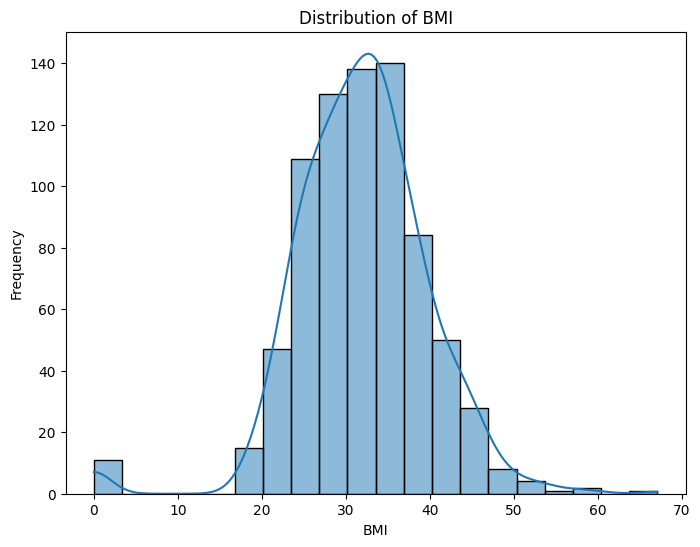

In [299]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

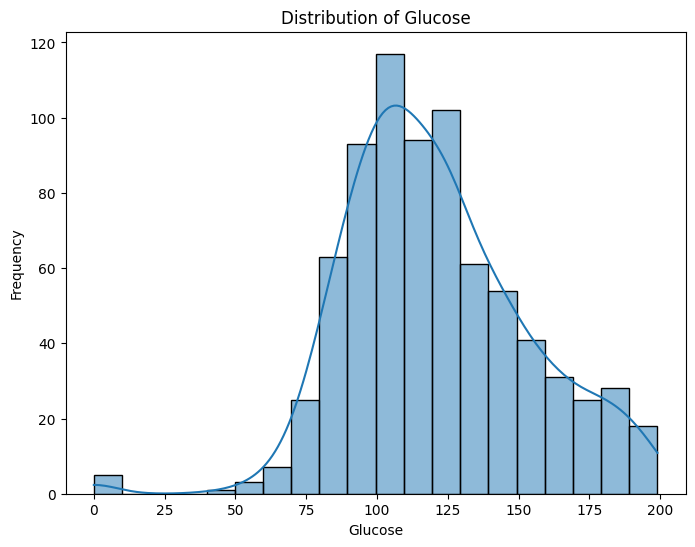

In [300]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()




C:\Users\63945\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


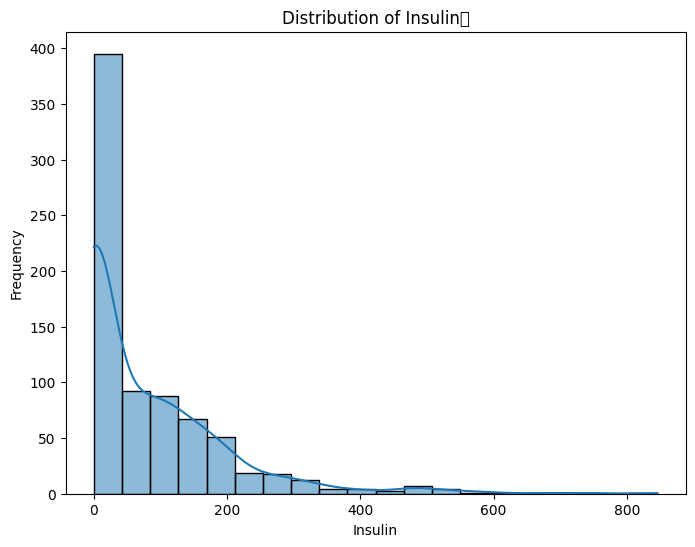

In [301]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], bins=20, kde=True)
plt.title('Distribution of Insulin	')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

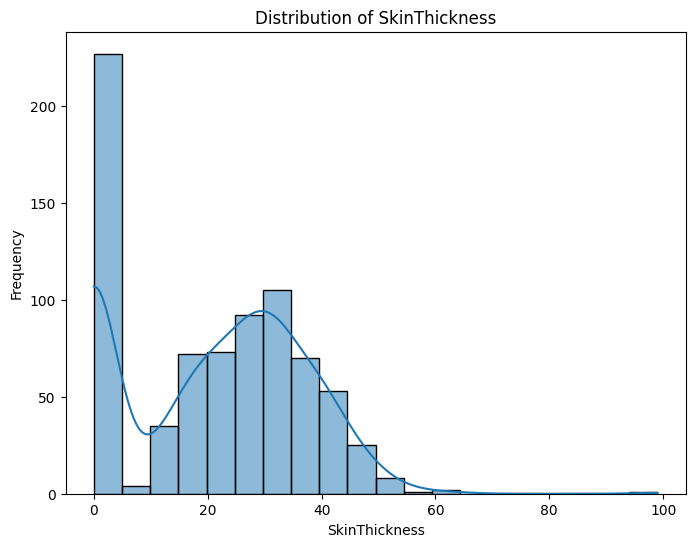

In [302]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SkinThickness'], bins=20, kde=True)
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

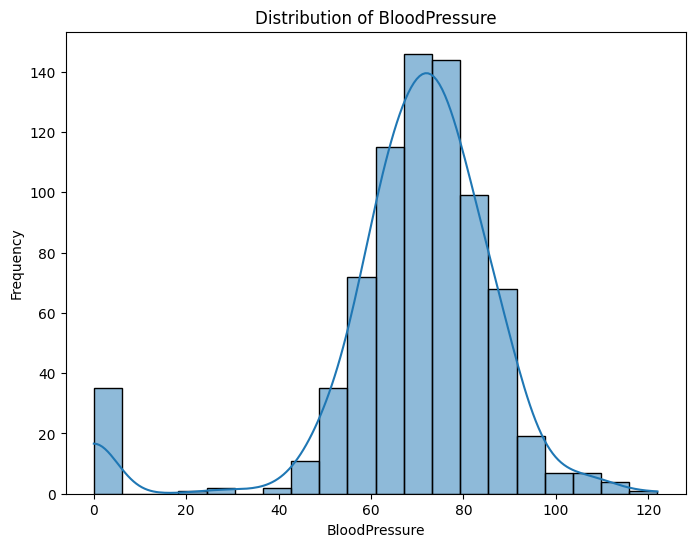

In [303]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BloodPressure'], bins=20, kde=True)
plt.title('Distribution of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

- For Blood Pressure, Glucose the distribution is not Normal distributed, so the values of 0 will be replaced by Median

- For Insulin and Skin Thickness, due to the large number of 0 values, which may indicate errors or null values in the data, there is  option to either remove these two columns or impute them using the median considering that their distributions are not normal. Since Insulin is a one of the most important variable of the study,  it's 0 values  imputate it by reaplcing it with the median of the data. 






Replace values of 0 for Median values:

In [304]:
median_bmi = df['BMI'].median()
df['BMI'] = df['BMI'].replace(0, median_bmi)

In [305]:
median_Glucose = df['Glucose'].median()
df['Glucose'] = df['Glucose'].replace(0, median_Glucose)

In [306]:
median_BloodPressure = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(0, median_BloodPressure)

In [307]:
median_Insulin = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0, median_Insulin)

In [382]:
#median_SkinThickness = df['SkinThickness'].median()
#df['SkinThickness'] = df['SkinThickness'].replace(0, median_SkinThickness)

df.drop('SkinThickness', axis=1, inplace=True)


In [383]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Exploratory Data Analysis (EDA)**

- Identify at least 4 exploratory data analysis questions. Properly state the questions in the notebook. Having more than 4 questions is acceptable, especially if this will help in understanding the data better.
- Answer the EDA questions using both:
    - Numerical Summaries – measures of central tendency, measures of dispersion, and correlation
    - Visualization – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.

###   Is there a relationship between Glucose and the Diabetes Outcome?

Measures of central tendency

In [342]:
glucose_mean_outcome_1 = df[df['Outcome'] == 1]['Glucose'].mean()
glucose_median_outcome_1 = df[df['Outcome'] == 1]['Glucose'].median()


print('Mean Glucose Level (Outcome 1)-',glucose_mean_outcome_1)
print('Median Glucose Level (Outcome 1)-',glucose_median_outcome_1)



Mean Glucose Level (Outcome 1)- 142.13059701492537
Median Glucose Level (Outcome 1)- 140.0


In [341]:
glucose_mean_outcome_0 = df[df['Outcome'] == 0]['Glucose'].mean()
glucose_median_outcome_0 = df[df['Outcome'] == 0]['Glucose'].median()



print('Mean Glucose Level (Outcome 0)-',glucose_mean_outcome_0)
print('Median Glucose Level (Outcome 0)-',glucose_median_outcome_0)




Mean Glucose Level (Outcome 0)- 110.682
Median Glucose Level (Outcome 0)- 107.5


- EXPLANATION

Measures of dispersion

In [339]:
glucose_std_outcome_1 = df[df['Outcome'] == 1]['Glucose'].std()
glucose_variance_outcome_1 = df[df['Outcome'] == 1]['Glucose'].var()
glucose_range_outcome_1 = df[df['Outcome'] == 1]['Glucose'].max() - df[df['Outcome'] == 1]['Glucose'].min()
glucose_iqr_outcome_1 = df[df['Outcome'] == 1]['Glucose'].quantile(0.75) - df[df['Outcome'] == 1]['Glucose'].quantile(0.25)

print('The Standard deviation of Glucose for Outcome 1 -',glucose_std_outcome_1)
print('The Variance of Glucose  for Outcome 1 -',glucose_variance_outcome_1)
print('The Range of Glucose  for Outcome 1 -',glucose_range_outcome_1)
print('The IQR of Glucose for Outcome 1 -',glucose_iqr_outcome_1)




The Standard deviation of Glucose for Outcome 1 - 29.568838561472912
The Variance of Glucose  for Outcome 1 - 874.3162138744474
The Range of Glucose  for Outcome 1 - 121
The IQR of Glucose for Outcome 1 - 48.0


In [343]:
glucose_std_outcome_0 = df[df['Outcome'] == 0]['Glucose'].std()
glucose_variance_outcome_0 = df[df['Outcome'] == 0]['Glucose'].var()
glucose_range_outcome_0 = df[df['Outcome'] == 0]['Glucose'].max() - df[df['Outcome'] == 0]['Glucose'].min()
glucose_iqr_outcome_0 = df[df['Outcome'] == 0]['Glucose'].quantile(0.75) - df[df['Outcome'] == 0]['Glucose'].quantile(0.25)

print('The Standard deviation  of Glucose for Outcome 0 -',glucose_std_outcome_0)
print('The Variance of Glucose  for Outcome 0 -',glucose_variance_outcome_0)
print('The Range for Glucose Outcome 0 -',glucose_range_outcome_0)
print('The IQR of Glucose for Outcome 0 -',glucose_iqr_outcome_0)

The Standard deviation  of Glucose for Outcome 0 - 24.70720072236169
The Variance of Glucose  for Outcome 0 - 610.44576753507
The Range for Glucose Outcome 0 - 153
The IQR of Glucose for Outcome 0 - 32.0


- EXPLANATION

- VISUALISATION

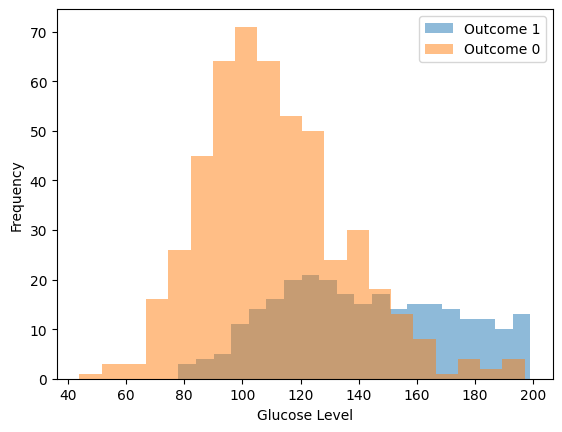

In [315]:

plt.hist(df[df['Outcome'] == 1]['Glucose'], alpha=0.5, label='Outcome 1', bins=20)
plt.hist(df[df['Outcome'] == 0]['Glucose'], alpha=0.5, label='Outcome 0', bins=20)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### BMI RELATIONSHIP WITH DIABETES 

- Measures of central tendency

In [345]:
mean_bmi_outcome_1 = df[df['Outcome'] == 1]['BMI'].median()
median_bmi_outcome_1 = df[df['Outcome'] == 1]['BMI'].median()


print('BMI Median(Outcome 1)',median_bmi_outcome_1)
print('BMI Mean(Outcome 1)',mean_bmi_outcome_1)



BMI Median(Outcome 1) 34.25
BMI Mean(Outcome 1) 34.25


In [346]:
mean_bmi_outcome_0 = df[df['Outcome'] == 0]['BMI'].mean()
median_bmi_outcome_0 = df[df['Outcome'] == 0]['BMI'].median()

print('BMI Mean(Outcome 0)',mean_bmi_outcome_0)
print('BMI Median(Outcome 0)',median_bmi_outcome_0)

BMI Mean(Outcome 0) 30.880200000000002
BMI Median(Outcome 0) 30.4


- EXPLANATION

- Measures of dispersion

In [348]:
BMI_std_outcome_1 = df[df['Outcome'] == 1]['BMI'].std()
BMI_variance_outcome_1 = df[df['Outcome'] == 1]['BMI'].var()
BMI_range_outcome_1 = df[df['Outcome'] == 1]['BMI'].max() - df[df['Outcome'] == 1]['BMI'].min()
BMI_iqr_outcome_1 = df[df['Outcome'] == 1]['BMI'].quantile(0.75) - df[df['Outcome'] == 1]['BMI'].quantile(0.25)

print('The Standard deviation of BMI for Outcome 1 -',BMI_std_outcome_1)
print('The Variance of BMI  for Outcome 1 -',BMI_variance_outcome_1)
print('The Range of BMI  for Outcome 1 -',BMI_range_outcome_1)
print('The IQR of BMIfor Outcome 1 -',BMI_iqr_outcome_1)

The Standard deviation of BMI for Outcome 1 - 6.596704067628949
The Variance of BMI  for Outcome 1 - 43.51650455587232
The Range of BMI  for Outcome 1 - 44.199999999999996
The IQR of BMIfor Outcome 1 - 7.875000000000007


In [349]:
BMI_std_outcome_0 = df[df['Outcome'] == 0]['BMI'].std()
BMI_variance_outcome_0 = df[df['Outcome'] == 0]['BMI'].var()
BMI_range_outcome_0 = df[df['Outcome'] == 0]['BMI'].max() - df[df['Outcome'] == 0]['BMI'].min()
BMI_iqr_outcome_0 = df[df['Outcome'] == 0]['BMI'].quantile(0.75) - df[df['Outcome'] == 0]['BMI'].quantile(0.25)

print('The Standard deviation of BMI for Outcome 0 -',BMI_std_outcome_0)
print('The Variance of BMI  for Outcome 0 -',BMI_variance_outcome_0)
print('The Range of BMI  for Outcome 0 -',BMI_range_outcome_0)
print('The IQR of BMIfor Outcome 0 -',BMI_iqr_outcome_0)

The Standard deviation of BMI for Outcome 0 - 6.503073726768871
The Variance of BMI  for Outcome 0 - 42.28996789579158
The Range of BMI  for Outcome 0 - 39.099999999999994
The IQR of BMIfor Outcome 0 - 9.549999999999997


- EXPANATION

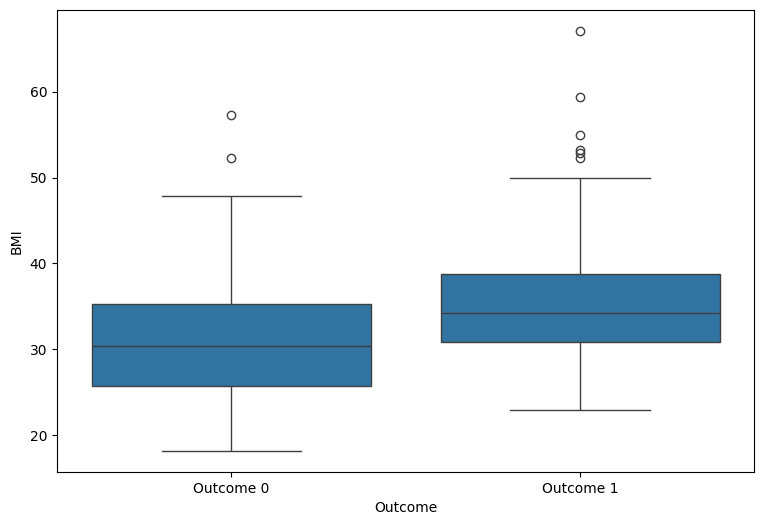

In [317]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.ylabel('BMI')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()

### How does the diabetes pedigree function vary among individuals with diabetes outcome  and is there a correlation between this function and age?

- Measure of Central Tendency

In [351]:
mean_pedigree_function_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].mean()
median_pedigree_function_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].median()

print('Mean of Pedigree Function (Outcome 1) -',mean_pedigree_function_outcome_1)
print('Mean of Pedigree Function (Outcome 1) -', median_pedigree_function_outcome_1)

# correlation_age_pedigree_function_outcome_1 = df[df['Outcome'] == 1]['Age'].corr(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'])
# print(correlation_age_pedigree_function_outcome_1)

Mean of Pedigree Function (Outcome 1) - 0.5505
Mean of Pedigree Function (Outcome 1) - 0.449


In [352]:
mean_pedigree_function_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].mean()
median_pedigree_function_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].median()

print('Mean of Pedigree Function (Outcome 0) -',mean_pedigree_function_outcome_1)
print('Mean of Pedigree Function (Outcome 0) -', median_pedigree_function_outcome_1)

Mean of Pedigree Function (Outcome 0) - 0.5505
Mean of Pedigree Function (Outcome 0) - 0.449


- EXPANATION

- Measures of dispersion

In [363]:
pedigree_function_std_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].std()
pedigree_function_variance_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].var()
pedigree_function_range_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].max() - df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].min()
pedigree_function_iqr_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].quantile(0.75) - df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].quantile(0.25)

print('The Standard deviation of DiabetesPedigreeFunction (Outcome 1) -',pedigree_function_std_outcome_1)
print('The Variance of DiabetesPedigreeFunction (Outcome 1)           -',pedigree_function_variance_outcome_1)
print('The Range of DiabetesPedigreeFunction  (Outcome 1)             -',pedigree_function_range_outcome_1)
print('The IQR of DiabetesPedigreeFunction (Outcome 1)                -',pedigree_function_iqr_outcome_1)

The Standard deviation of DiabetesPedigreeFunction (Outcome 1) - 0.372354483554611
The Variance of DiabetesPedigreeFunction (Outcome 1)           - 0.13864786142322105
The Range of DiabetesPedigreeFunction  (Outcome 1)             - 2.332
The IQR of DiabetesPedigreeFunction (Outcome 1)                - 0.46549999999999997


In [362]:
pedigree_function_std_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].std()
pedigree_function_variance_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].var()
pedigree_function_range_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].max() - df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].min()
pedigree_function_iqr_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].quantile(0.75) - df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].quantile(0.25)

print('The Standard deviation of DiabetesPedigreeFunction (Outcome 0) - ',pedigree_function_std_outcome_0)
print('The Variance of DiabetesPedigreeFunction (Outcome 0)           - ',         pedigree_function_variance_outcome_0)
print('The Range of DiabetesPedigreeFunction (Outcome 0)              - ',            pedigree_function_range_outcome_0)
print('The IQR of DiabetesPedigreeFunction (Outcome 0)                - ',               pedigree_function_iqr_outcome_0)

The Standard deviation of DiabetesPedigreeFunction (Outcome 0) -  0.29908530435741093
The Variance of DiabetesPedigreeFunction (Outcome 0)           -  0.08945201928256515
The Range of DiabetesPedigreeFunction (Outcome 0)              -  2.2510000000000003
The IQR of DiabetesPedigreeFunction (Outcome 0)                -  0.33199999999999996


- EXPLANATION -

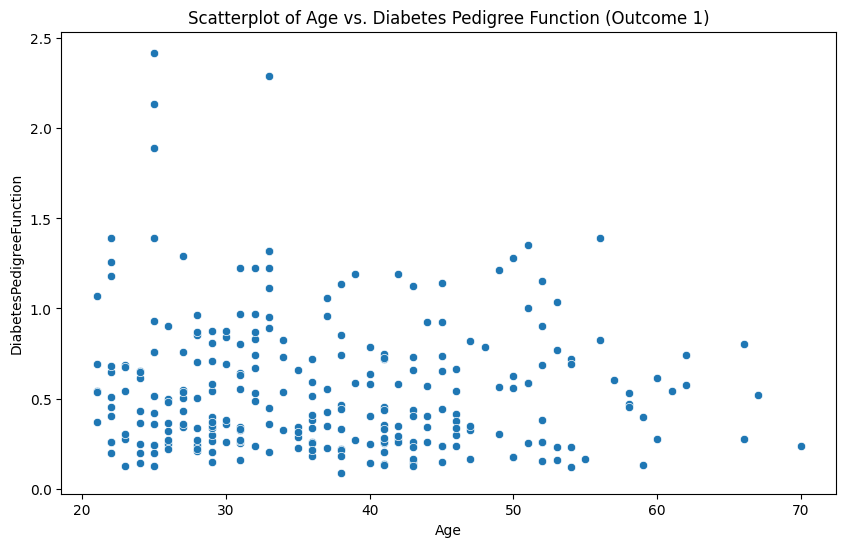

In [319]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=df[df['Outcome'] == 1])
plt.title('Scatterplot of Age vs. Diabetes Pedigree Function (Outcome 1)')
plt.show()



### RELATIONSHIP B/W PREGNANCIES AND DIABETES

- Measures of Central Tendency

In [373]:
mean_pregnancies_outcome_1 = df[df['Outcome'] == 1]['Pregnancies'].mean()
median_pregnancies_outcome_1 = df[df['Outcome'] == 1]['Pregnancies'].median()



print('Mean of Pregnancies  (Outcome 1)   -',   mean_pregnancies_outcome_1)
print('Median of Pregnancies   (Outcome 1) -', median_pregnancies_outcome_1 )



Mean of Pregnancies  (Outcome 1)   - 4.865671641791045
Median of Pregnancies   (Outcome 1) - 4.0


In [374]:
mean_pregnancies_outcome_0 = df[df['Outcome'] == 0]['Pregnancies'].mean()
median_pregnancies_outcome_0 = df[df['Outcome'] == 0]['Pregnancies'].median()



print('Mean of Pregnancies (Outcome 0)   -',   mean_pregnancies_outcome_0)
print('Median of Pregnancies (Outcome 0) -', median_pregnancies_outcome_0)

Mean of Pregnancies (Outcome 0)   - 3.298
Median of Pregnancies (Outcome 0) - 2.0


- EXPLANATION -

- Measures of dispersion

In [376]:
pregnancies_function_std_outcome_1 = df[df['Outcome'] == 1]['Pregnancies'].std()
pregnancies_function_variance_outcome_1 = df[df['Outcome'] == 1]['Pregnancies'].var()
pregnancies_function_range_outcome_1 = df[df['Outcome'] == 1]['Pregnancies'].max() - df[df['Outcome'] == 1]['Pregnancies'].min()
pregnancies_function_iqr_outcome_1 = df[df['Outcome'] == 1]['Pregnancies'].quantile(0.75) - df[df['Outcome'] == 1]['Pregnancies'].quantile(0.25)

print('The Standard deviation of Pregnancies (Outcome 1) -',pregnancies_function_std_outcome_1)
print('The Variance of Pregnancies (Outcome 1)           -',pregnancies_function_variance_outcome_1)
print('The Range of Pregnancies (Outcome 1)              -', pregnancies_function_range_outcome_1)
print('The IQR of Pregnancies (Outcome 1)                -',pregnancies_function_iqr_outcome_1)

The Standard deviation of Pregnancies (Outcome 1) - 3.741239044041554
The Variance of Pregnancies (Outcome 1)           - 13.996869584660963
The Range of Pregnancies (Outcome 1)              - 17
The IQR of Pregnancies (Outcome 1)                - 6.25


In [378]:
pregnancies_function_std_outcome_0 = df[df['Outcome'] == 0]['Pregnancies'].std()
pregnancies_function_variance_outcome_0 = df[df['Outcome'] == 0]['Pregnancies'].var()
pregnancies_function_range_outcome_0 = df[df['Outcome'] == 0]['Pregnancies'].max() - df[df['Outcome'] == 0]['Pregnancies'].min()
pregnancies_function_iqr_outcome_0 = df[df['Outcome'] == 0]['Pregnancies'].quantile(0.75) - df[df['Outcome'] == 0]['Pregnancies'].quantile(0.25)

print('The Standard deviation of Pregnancies (Outcome 1) -',pregnancies_function_std_outcome_0)
print('The Variance of Pregnancies (Outcome 1)           -',pregnancies_function_variance_outcome_0 )
print('The Range of Pregnancies (Outcome 1)              -',pregnancies_function_range_outcome_0 )
print('The IQR of Pregnancies (Outcome 1)                -',pregnancies_function_iqr_outcome_0)

The Standard deviation of Pregnancies (Outcome 1) - 3.01718458262189
The Variance of Pregnancies (Outcome 1)           - 9.103402805611228
The Range of Pregnancies (Outcome 1)              - 13
The IQR of Pregnancies (Outcome 1)                - 4.0


- EXPLANATION -

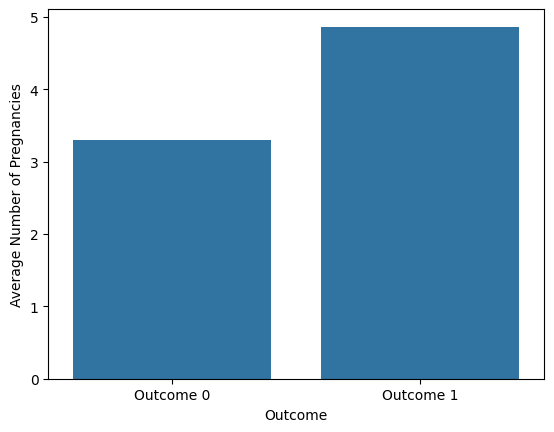

In [364]:
# Visualization
sns.barplot(x='Outcome', y='Pregnancies', data=df, errorbar=None)
plt.ylabel('Average Number of Pregnancies')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()
